In [1]:
# installing Dependencies

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn

**Importing all the dependencies**

In [ ]:
# core libraries
import numpy as np      # Numerical operations and array management 
import pandas as pd     # Data manipulation, cleaning, filtering, aggregation

#visualization Libraries
import matplotlib.pyplot as plt   # Basic plotting (histograms, line plots, etc.)
import seaborn as sns             # Statistical visualization (correlations, heatmaps, etc.)

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore non-critical warnings to keep output clean

**Read CSV dataset**

In [4]:
df = pd.read_csv("/home/rafi/Project/healthcare_eda/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


In [6]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

*Numerical column*

In [7]:
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Age', 'Billing Amount', 'Room Number']


In [8]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.

df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


*Non-numeric / Object Column Name*

In [9]:
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [10]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
df.describe(include = 'object').T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [11]:
#computes summary of the DataFrame including numeric and categorical columns.

df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [12]:
# return a tuple with the dimension of the dataframe
df.shape

(55500, 15)

There are 555000 rows and 15 columns in this dataset.

**DATA CLEANING**

*Null Values*

Incase there were null values we can get rid of them using dropna function.

In [13]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [14]:
# dropping rows with Null values

df.dropna(inplace=True)
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

*Duplicate rows*

In [15]:
#check if there are duplicate records in the data

df_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {df_duplicated}")

Number of duplicated rows: 534


In [16]:
# drop duplicates
df = df.drop_duplicates()

# check duplicated rows agin
df_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {df_duplicated}")

Number of duplicated rows: 0


In [17]:
print(f"Rows in Data: {df.shape[0]}, Columns in Data: {df.shape[1]})")
df.shape

Rows in Data: 54966, Columns in Data: 15)


(54966, 15)

**Standardize Name Columns**

In [18]:
df["Name"]

0            Bobby JacksOn
1             LesLie TErRy
2              DaNnY sMitH
3             andrEw waTtS
4            adrIENNE bEll
               ...        
55495    eLIZABeTH jaCkSOn
55496           KYle pEREz
55497         HEATher WaNG
55498       JENniFER JOneS
55499         jAMES GARCiA
Name: Name, Length: 54966, dtype: object

name isn't added here correctly. we need to make correction here.

In [19]:
df['Name'] = df['Name'].str.title()
df['Name']

0            Bobby Jackson
1             Leslie Terry
2              Danny Smith
3             Andrew Watts
4            Adrienne Bell
               ...        
55495    Elizabeth Jackson
55496           Kyle Perez
55497         Heather Wang
55498       Jennifer Jones
55499         James Garcia
Name: Name, Length: 54966, dtype: object

Now, Name column looks fine.

**Adjusting Billing Account**

In [20]:
count_non_positive = df[df['Billing Amount'] <= 0].shape[0]
print("Number of rows with Billing Amount <= 0:", count_non_positive)

Number of rows with Billing Amount <= 0: 106


about 106 patients has negative bill number, which can't be possible. what we can do is convert them into posive or drop those patient column.

In [21]:
# Remove rows where Billing Amount is zero or negative and keep only positive value
# df = df[df['Billing Amount'] > 0]

In [22]:
# Convert all billing amounts to positive values
df['Billing Amount'] = df['Billing Amount'].abs()

In [23]:
count_non_positive = df[df['Billing Amount'] <= 0].shape[0]
print("Number of rows with Billing Amount <= 0:", count_non_positive)

Number of rows with Billing Amount <= 0: 0


now, it looks good. 

**Date column type change from object to date**

In [24]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date])
    
#calculate the no: of days patients got admitted in hospital
df['Days Hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)
df['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 54966, dtype: int64

**Analyze Hospital Stay Patterns**

In [25]:
stay_range = df.groupby('Medical Condition')['Days Hospitalized'].agg(['min', 'max', 'mean']).sort_values(by='max', ascending=False)
print("Minimum and Maximum Days in Hospital by Condition:\n", stay_range)

Minimum and Maximum Days in Hospital by Condition:
                    min  max       mean
Medical Condition                     
Arthritis            1   30  15.504231
Asthma               1   30  15.677295
Cancer               1   30  15.501204
Diabetes             1   30  15.430664
Hypertension         1   30  15.436236
Obesity              1   30  15.447627


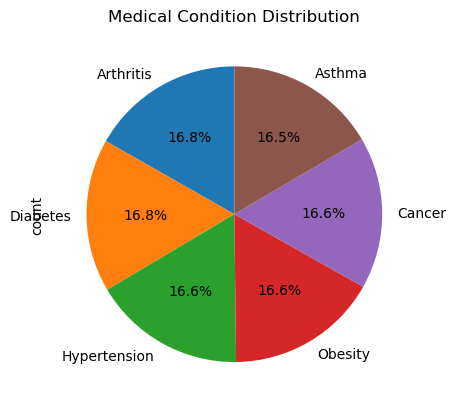

In [47]:
df['Medical Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set the title of the plot 
plt.title("Medical Condition Distribution") 
# Display the plot 
plt.show()

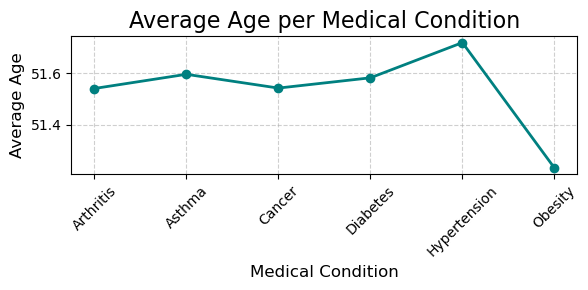

In [55]:
avg_age = df.groupby('Medical Condition')['Age'].mean().sort_index()


# Plot line chart
plt.figure(figsize=(6, 3))
plt.plot(avg_age.index, avg_age.values, marker='o', color='teal', linewidth=2)

plt.title('Average Age per Medical Condition', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Analyze Hospital Bill Patterns**

In [26]:
billing_stats = df.groupby('Medical Condition')['Billing Amount'].agg(['min', 'max', 'mean']).round(2)
billing_stats = billing_stats.rename(columns={
    'min': 'Min Billing',
    'max': 'Max Billing',
    'mean': 'Average Billing'
})
print("Billing Stats by Medical Condition:\n", billing_stats)

Billing Stats by Medical Condition:
                    Min Billing  Max Billing  Average Billing
Medical Condition                                           
Arthritis                26.11     52170.04         25513.05
Asthma                   32.35     52181.84         25635.64
Cancer                    9.24     52373.03         25154.73
Diabetes                 31.03     52211.85         25662.15
Hypertension             23.87     52764.28         25504.91
Obesity                  36.22     52024.73         25806.63


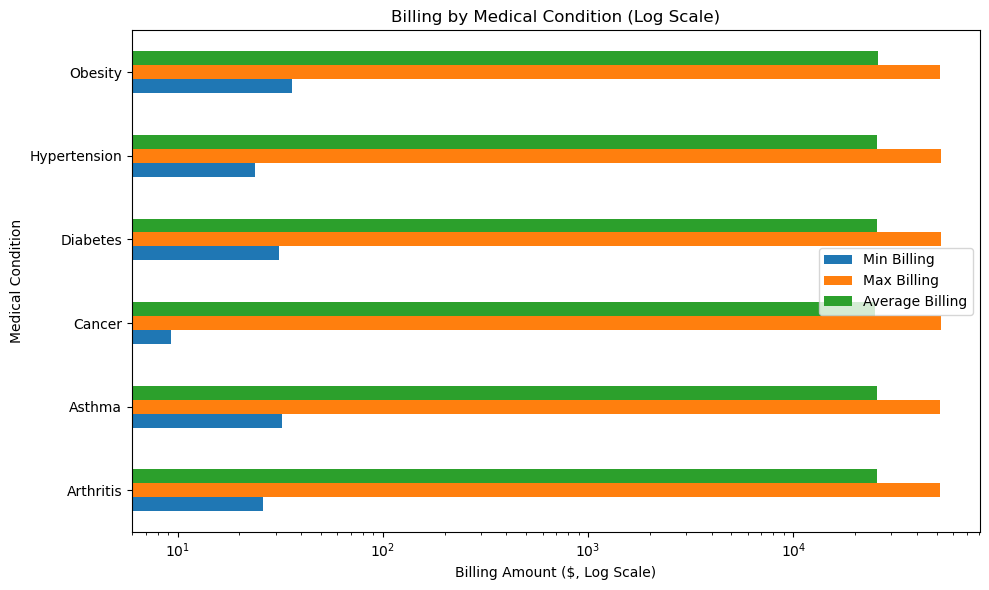

In [28]:
billing_stats.plot(kind='barh', figsize=(10, 6), logx=True)
plt.title('Billing by Medical Condition (Log Scale)')
plt.xlabel('Billing Amount ($, Log Scale)')
plt.tight_layout()
plt.show()

**Insurance Provider by Medical Condition**

In [29]:
billing_stats = df.groupby('Medical Condition')['Billing Amount'].agg(['min', 'max', 'mean']).round(2)
billing_stats = billing_stats.rename(columns={
    'min': 'Min Insurance',
    'max': 'Max Insurance',
    'mean': 'Average Insurance'
})
print("Insurance Provider by Medical Condition:\n", billing_stats)

Insurance Provider by Medical Condition:
                    Min Insurance  Max Insurance  Average Insurance
Medical Condition                                                 
Arthritis                  26.11       52170.04           25513.05
Asthma                     32.35       52181.84           25635.64
Cancer                      9.24       52373.03           25154.73
Diabetes                   31.03       52211.85           25662.15
Hypertension               23.87       52764.28           25504.91
Obesity                    36.22       52024.73           25806.63


In [30]:
insurance_summary = df.groupby('Insurance Provider')['Billing Amount'].agg(['count', 'sum']).round(2)
insurance_summary = insurance_summary.rename(columns={
    'count': 'Number of Patients',
    'sum': 'Total Billing ($)'
})

print("Insurance Summary:\n", insurance_summary)


Insurance Summary:
                     Number of Patients  Total Billing ($)
Insurance Provider                                       
Aetna                            10822       2.765347e+08
Blue Cross                       10952       2.804243e+08
Cigna                            11139       2.843588e+08
Medicare                         11039       2.829313e+08
UnitedHealthcare                 11014       2.799257e+08


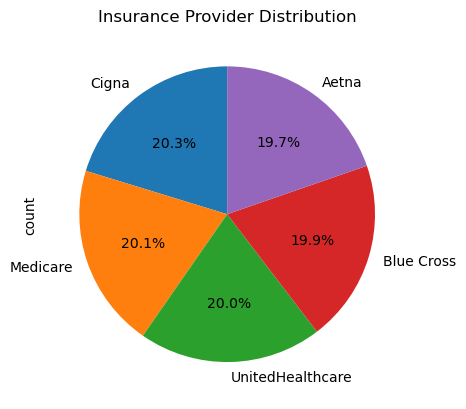

In [49]:
df['Insurance Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set the title of the plot 
plt.title("Insurance Provider Distribution") 
# Display the plot 
plt.show()

*billing amount for top 10 hospitals*

In [59]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = df.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,1.081477e+06
1,LLC Smith,1.030190e+06
2,Smith PLC,1.029424e+06
3,Ltd Smith,1.003366e+06
4,Smith Ltd,9.700359e+05
5,Johnson Inc,9.395518e+05
6,Group Smith,9.029758e+05
7,Inc Brown,8.779613e+05
8,LLC Johnson,8.164384e+05
9,Smith Group,8.069046e+05


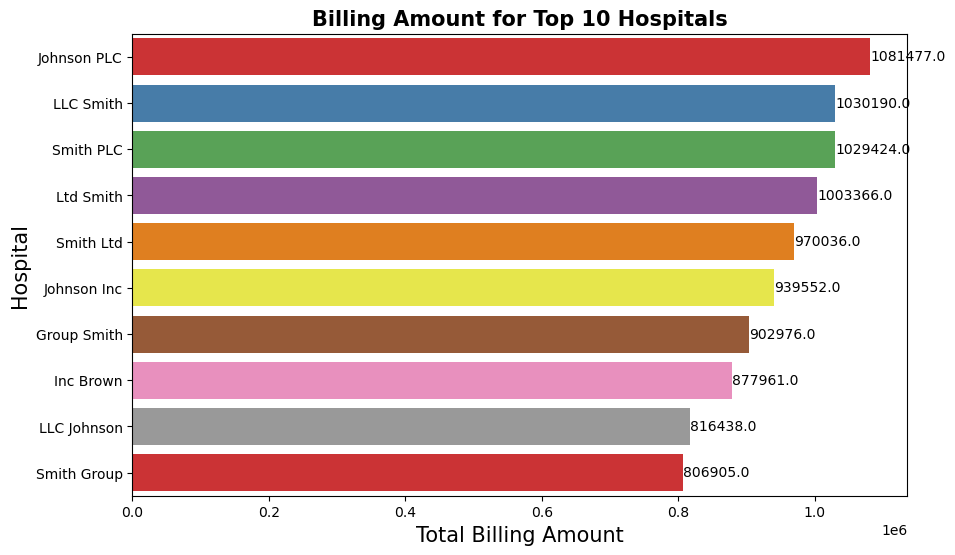

In [60]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

*top 20 doctors by billing amount*

In [61]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = df.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Smith,784501.843132
1,John Smith,610109.604175
2,Robert Smith,609160.688766
3,Robert Johnson,524193.003178
4,David Smith,473345.609187
5,William Johnson,469198.116030
6,John Johnson,466769.966463
7,James Smith,462089.338463
8,Michael Johnson,460819.038528
9,David Johnson,445605.542275


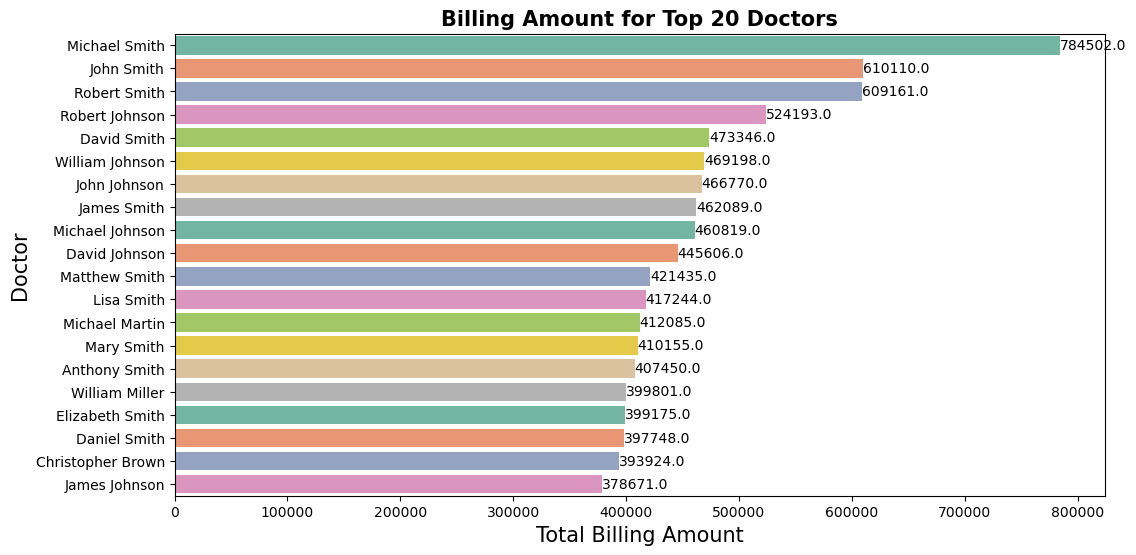

In [62]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

**Distribution of different age groups**

In [56]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(min_age,",",max_age)

13 , 89


Medical Condition
Obesity         51.233217
Arthritis       51.540464
Cancer          51.542123
Diabetes        51.581814
Asthma          51.595382
Hypertension    51.717954
Name: Age, dtype: float64


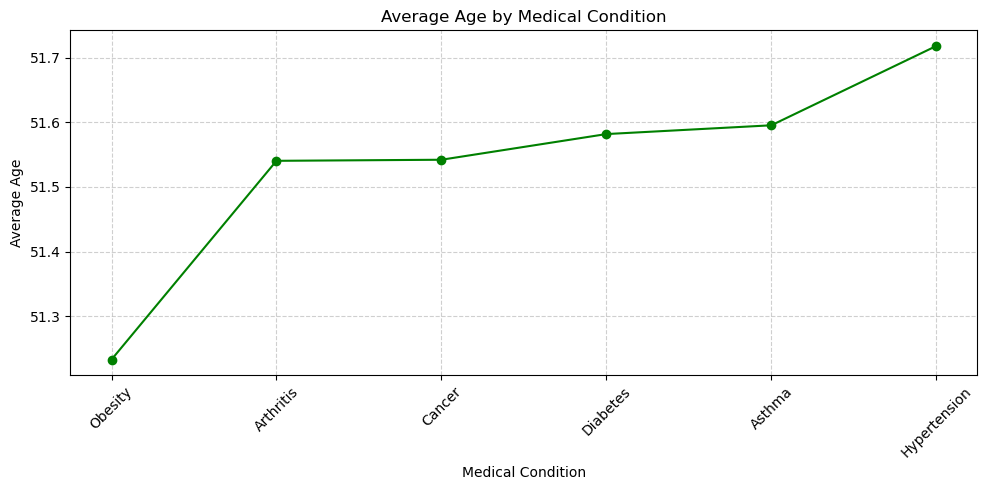

In [57]:
avg_age_by_condition = df.groupby('Medical Condition')['Age'].mean().sort_values()
print(avg_age_by_condition)

plt.figure(figsize=(10, 5))
plt.plot(avg_age_by_condition.index, avg_age_by_condition.values, marker='o', color='green')
plt.title('Average Age by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Gender distribution**

In [32]:
gender_counts = df['Gender'].value_counts()
print("Gender Count:\n", gender_counts)

Gender Count:
 Gender
Male      27496
Female    27470
Name: count, dtype: int64


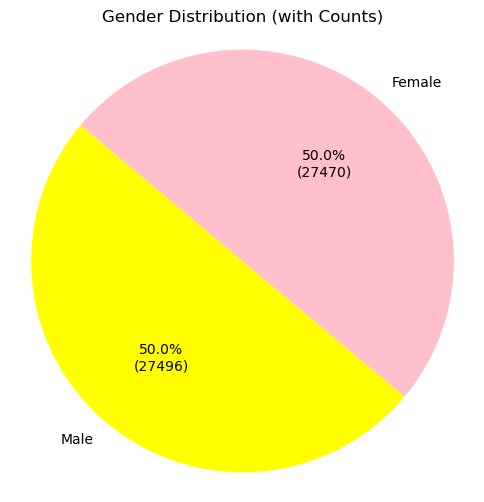

In [40]:
# Count values
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['yellow', 'pink']

# Custom autopct to show value + percent
def autopct_format(pct):
    total = sum(sizes)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=autopct_format, colors=colors, startangle=140)
plt.title('Gender Distribution (with Counts)')
plt.axis('equal')
plt.show()

*Count of Males & Females per Condition*

In [45]:
#unstack function converts the data into 2 dimensional

condition_gender_count = df.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
condition_gender_count

Gender,Female,Male
Medical Condition,,
Arthritis,4642,4576
Asthma,4511,4584
Cancer,4566,4574
Diabetes,4609,4607
Hypertension,4569,4582
Obesity,4573,4573


*Bar Graph*

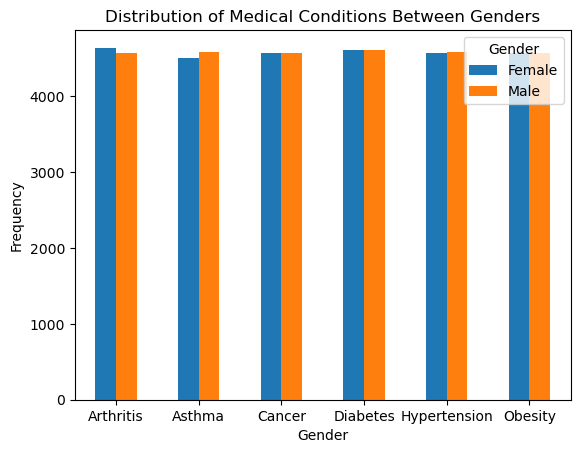

In [46]:
condition_gender_count.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

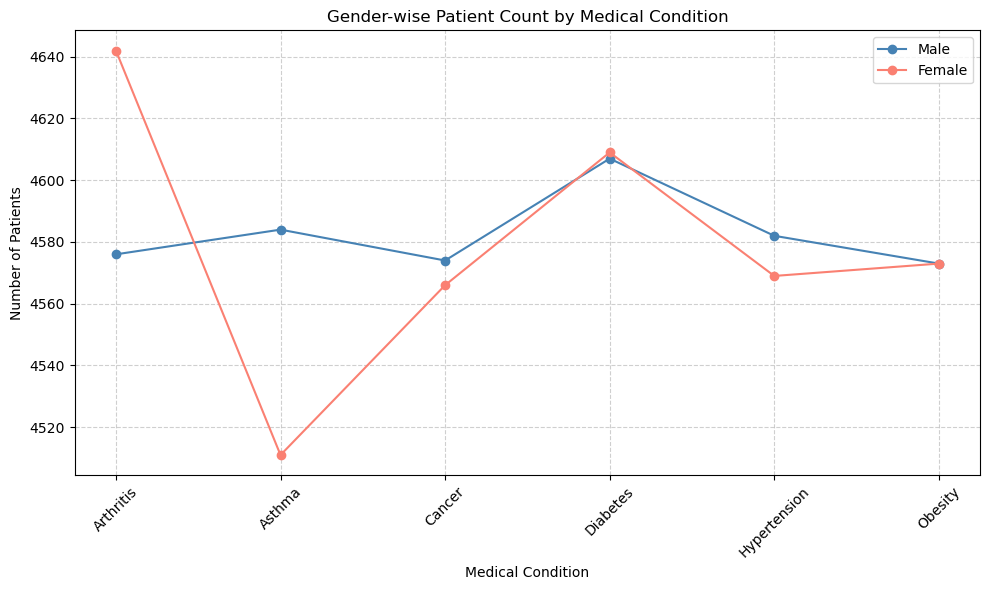

In [43]:
# Prepare data
condition_gender_count = df.groupby(['Medical Condition', 'Gender']).size().unstack().fillna(0).astype(int)
condition_gender_count = condition_gender_count.sort_index()  # ensure consistent order

# Plot
plt.figure(figsize=(10,6))
plt.plot(condition_gender_count.index, condition_gender_count['Male'], marker='o', label='Male', color='steelblue')
plt.plot(condition_gender_count.index, condition_gender_count['Female'], marker='o', label='Female', color='salmon')

plt.title('Gender-wise Patient Count by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = df.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25338.126833
1,Arthritis,Male,25690.499914
2,Asthma,Female,25362.037092
3,Asthma,Male,25904.885733
4,Cancer,Female,25287.112540
5,Cancer,Male,25022.580191
6,Diabetes,Female,25559.459944
7,Diabetes,Male,25764.878853
8,Hypertension,Female,25436.323751
9,Hypertension,Male,25573.294067


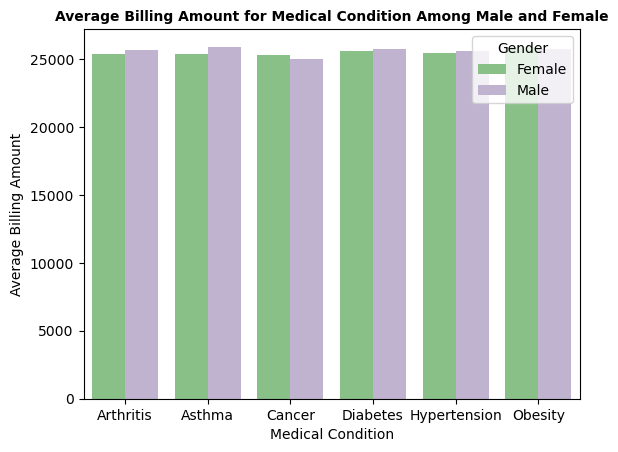

In [65]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 10)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 10, weight = 'bold')
plt.show()


**Blood Type Distribution**

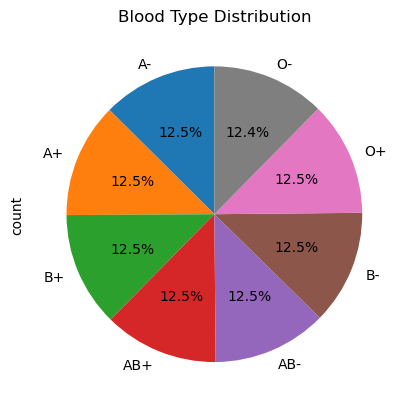

In [48]:
df['Blood Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set the title of the plot 
plt.title("Blood Type Distribution") 
# Display the plot 
plt.show()

**Admission Type Distribution**

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64


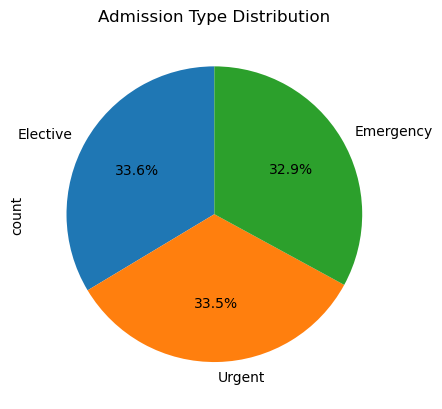

In [69]:
# Print the count of each Admission Type
print(df['Admission Type'].value_counts())

df['Admission Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set the title of the plot 
plt.title("Admission Type Distribution") 
# Display the plot 
plt.show()

**Test Result Distribution**

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


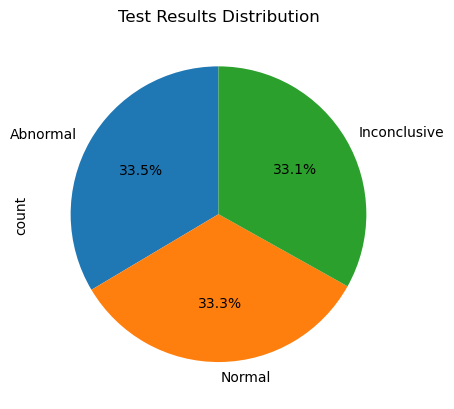

In [68]:
# Print the count of each category
print(df['Test Results'].value_counts())

# Plot the pie chart
df['Test Results'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
# Set the title of the plot 
plt.title("Test Results Distribution") 
# Display the plot 
plt.show()